<a href="https://colab.research.google.com/github/Longbuivu/Artifical-Intelligence/blob/main/Nhan_Dang_11_Loai_Tien_Giay_Viet_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bùi Vũ Long - 19146205
**Nhận dạng 11 loại tiền giấy Việt Nam**

In [33]:
#link Google Drive data: https://drive.google.com/drive/folders/1dGJkIdZP0CTY7219h6pR4ipBZdE8DBEV?usp=sharing
#Các thư viện cần thiết
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator

In [52]:
import os
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
tien = ['1000','10000','100000','200','2000','20000','200000','500','5000','50000','500000']
dir_train = '/content/drive/MyDrive/AI/11 Loai Tien Giay/Train' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in tien:
    path = os.path.join(dir,i)
    index_label = tien.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 

In [53]:
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 11)
print(x_train.shape)
print(y_train.shape)
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(27,48),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(150,150,3),
                 strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(11, activation='softmax', name='layer4'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

(605, 150, 150, 3)
(605, 11)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 layer1 (Dense)         

In [54]:
history = model.fit(x_train,y_train,epochs = 20,batch_size=64, verbose=1)

Epoch 1/20
10/10 [==============================] - 17s 2s/step - loss: 2.4895 - accuracy: 0.0909
Epoch 2/20
10/10 [==============================] - 16s 2s/step - loss: 2.3751 - accuracy: 0.1107
Epoch 3/20
10/10 [==============================] - 16s 2s/step - loss: 2.1757 - accuracy: 0.2033
Epoch 4/20
10/10 [==============================] - 16s 2s/step - loss: 1.7014 - accuracy: 0.3190
Epoch 5/20
10/10 [==============================] - 16s 2s/step - loss: 1.4031 - accuracy: 0.4628
Epoch 6/20
10/10 [==============================] - 16s 2s/step - loss: 1.1533 - accuracy: 0.5421
Epoch 7/20
10/10 [==============================] - 16s 2s/step - loss: 1.1950 - accuracy: 0.5273
Epoch 8/20
10/10 [==============================] - 15s 2s/step - loss: 0.7276 - accuracy: 0.6926
Epoch 9/20
10/10 [==============================] - 16s 2s/step - loss: 0.4645 - accuracy: 0.8050
Epoch 10/20
10/10 [==============================] - 16s 2s/step - loss: 0.2919 - accuracy: 0.8826
Epoch 11/20
10/10 [

In [55]:
model.save('/content/drive/MyDrive/AI/11 Loai Tien Giay/11_Loai_Tien_Giay.h5')

In [56]:
from keras.models import load_model
model5=load_model('/content/drive/MyDrive/AI/11 Loai Tien Giay/11_Loai_Tien_Giay.h5')

[[7.7285976e-14 1.5590888e-06 7.7195520e-14 2.7473840e-13 6.6721842e-14
  3.6539741e-31 9.9995172e-01 2.0309710e-05 5.6903029e-22 2.6411590e-05
  1.6823626e-17]]
Giá trị dự đoán: 6
200000


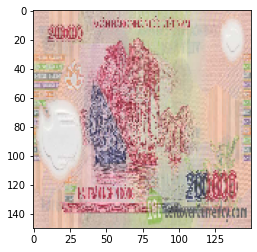

In [58]:
img = image.load_img('/content/drive/MyDrive/AI/11 Loai Tien Giay/Test/200000/200000- 15.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=1)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
tien[y_classes[0]]
#tien = ['1000','10000','100000','200','2000','20000','200000','500','5000','50000','500000']
print('Giá trị dự đoán:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print("1000")
if np.argmax(model.predict(img)) == 1:
   print("10000")
if np.argmax(model.predict(img)) == 2:
   print("100000")
if np.argmax(model.predict(img)) == 3:
   print("200")
if np.argmax(model.predict(img)) == 4:
   print("2000")
if np.argmax(model.predict(img)) == 5:
   print("20000")
if np.argmax(model.predict(img)) == 6:
   print("200000")
if np.argmax(model.predict(img)) == 7:
   print("500")
if np.argmax(model.predict(img)) == 8:
   print("5000")
if np.argmax(model.predict(img)) == 9:
   print("50000")
if np.argmax(model.predict(img)) == 10:
   print("500000")

[[1.4542993e-05 1.0401719e-27 7.1419695e-25 1.4780967e-10 2.7360549e-04
  3.3855529e-25 2.7248305e-20 6.8914362e-13 9.9971181e-01 7.0498843e-17
  5.0094608e-18]]
Giá trị dự đoán: 8
5000


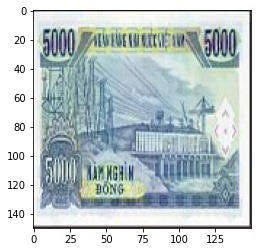

In [59]:
img = image.load_img('/content/drive/MyDrive/AI/11 Loai Tien Giay/Test/5000/5000- 54.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=1)
result=model.predict(img)
print(result)
y_classes = [np.argmax(element) for element in result]
y_classes
tien[y_classes[0]]
#tien = ['1000','10000','100000','200','2000','20000','200000','500','5000','50000','500000']
print('Giá trị dự đoán:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print("1000")
if np.argmax(model.predict(img)) == 1:
   print("10000")
if np.argmax(model.predict(img)) == 2:
   print("100000")
if np.argmax(model.predict(img)) == 3:
   print("200")
if np.argmax(model.predict(img)) == 4:
   print("2000")
if np.argmax(model.predict(img)) == 5:
   print("20000")
if np.argmax(model.predict(img)) == 6:
   print("200000")
if np.argmax(model.predict(img)) == 7:
   print("500")
if np.argmax(model.predict(img)) == 8:
   print("5000")
if np.argmax(model.predict(img)) == 9:
   print("50000")
if np.argmax(model.predict(img)) == 10:
   print("500000")